In [258]:
import ast
from bs4 import BeautifulSoup
import csv
from itertools import combinations
import json
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import pylab
import re
import requests
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy import stats
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sqlite3
from sqlite3 import Error
import time
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")

In [259]:
# Loading skincare_df data set
skincare_df = pd.read_csv("/Users/florencialeoni/code/i_feel_pretty/data/skincare_df.csv")

In [260]:
skincare_df.head()

,Unnamed: 0,brand,name,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category_Anti-Aging,...,category_Setting_Spray_&_Powder,category_Sheet_Masks,category_Skincare,category_Tinted_Moisturizer,category_Toners,category_Tools,category_Value_&_Gift_Sets,reviews_to_loves_ratio,return_on_reviews,price_per_ounce
0,0,Drunk Elephant,Protini Polypeptide Moisturizer,68.0,1000,136008,4.2097,1.69,1,0,...,0,0,0,0,0,0,0,0.74,0.42,40.24
1,1,La Mer,Crreme de la Mer,175.0,493,61648,4.0974,1.00,0,0,...,0,0,0,0,0,0,0,0.80,0.83,175.00
2,2,IT Cosmetics,CC+ Cream with SPF 50+,39.0,2000,188389,4.0403,1.08,0,0,...,0,0,0,0,0,0,0,1.06,0.20,36.11
3,3,Tatcha,The Water Cream,68.0,1000,149323,4.2447,1.70,1,0,...,0,0,0,0,0,0,0,0.67,0.42,40.00
4,4,SK-II,Facial Treatment Essence,179.0,788,68880,4.0622,NaN,0,0,...,0,0,0,0,0,0,0,1.14,0.52,NaN


In [261]:
# Loading pretty_numbers data set
pretty_numbers = pd.read_csv("/Users/florencialeoni/code/i_feel_pretty/data/pretty_numbers.csv")

In [262]:
pretty_numbers.head()

,Unnamed: 0,price,n_of_reviews,n_of_loves,review_score,size,clean_product,category_Anti-Aging,category_BB_&_CC_Cream,category_Bath_&_Shower,...,category_Skincare,category_Tinted_Moisturizer,category_Toners,category_Tools,category_Value_&_Gift_Sets,reviews_to_loves_ratio,return_on_reviews,price_per_ounce,reviews_to_loves_log,return_on_reviews_log
0,0,68.0,1000,136008,4.2097,1.69,1,0,0,0,...,0,0,0,0,0,0.74,0.42,40.24,-0.30,-0.87
1,1,175.0,493,61648,4.0974,1.00,0,0,0,0,...,0,0,0,0,0,0.80,0.83,175.00,-0.22,-0.19
2,2,39.0,2000,188389,4.0403,1.08,0,0,1,0,...,0,0,0,0,0,1.06,0.20,36.11,0.06,-1.61
3,3,68.0,1000,149323,4.2447,1.70,1,0,0,0,...,0,0,0,0,0,0.67,0.42,40.00,-0.40,-0.87
4,4,179.0,788,68880,4.0622,NaN,0,0,0,0,...,0,0,0,0,0,1.14,0.52,NaN,0.13,-0.65


In [263]:
pretty_numbers.columns

Index(['Unnamed: 0', 'price', 'n_of_reviews', 'n_of_loves', 'review_score',
       'size', 'clean_product', 'category_Anti-Aging',
       'category_BB_&_CC_Cream', 'category_Bath_&_Shower',
       'category_Beauty_Supplements', 'category_Blemish_&_Acne_Treatments',
       'category_Blotting_Papers', 'category_Body_Lotions_&_Body_Oils',
       'category_Cellulite_&_Stretch_Marks',
       'category_Decollete_&_Neck_Creams', 'category_Exfoliators',
       'category_Eye_Creams_&_Treatments', 'category_Eye_Masks',
       'category_Face_Masks', 'category_Face_Oils', 'category_Face_Primer',
       'category_Face_Serums', 'category_Face_Sunscreen',
       'category_Face_Wash_&_Cleansers', 'category_Facial_Peels',
       'category_Foundation', 'category_Hair_Oil', 'category_Highlighter',
       'category_Holistic_Wellness', 'category_Mini_Size',
       'category_Mists_&_Essences', 'category_Moisturizer_&_Treatments',
       'category_Moisturizers', 'category_Night_Creams',
       'category_Sett

In [264]:
# Loading pretty_regression data set
pretty_regression = pd.read_csv("/Users/florencialeoni/code/i_feel_pretty/data/pretty_regression.csv")

In [265]:
pretty_regression.head()

,Unnamed: 0,price,n_of_reviews,n_of_loves,review_score,size,clean_product,return_on_reviews,reviews_to_loves_ratio,price_per_ounce
0,0,68.0,1000,136008,4.2097,1.69,1,0.42,0.74,40.24
1,1,175.0,493,61648,4.0974,1.00,0,0.83,0.80,175.00
2,2,39.0,2000,188389,4.0403,1.08,0,0.20,1.06,36.11
3,3,68.0,1000,149323,4.2447,1.70,1,0.42,0.67,40.00
4,4,179.0,788,68880,4.0622,NaN,0,0.52,1.14,NaN


In [266]:
# Drop Unnamed: 0 column from each dataframe
skincare_df = skincare_df.drop(["Unnamed: 0"], axis=1)
pretty_numbers = pretty_numbers.drop(["Unnamed: 0"], axis=1)
pretty_regression = pretty_regression.drop(["Unnamed: 0"], axis=1)

In [267]:
# Splitting the dataset
train, test = train_test_split(pretty_numbers, test_size=0.2)

In [268]:
# Splitting the dataset
train_1, test_1 = train_test_split(pretty_regression, test_size=0.2)

In [269]:
# Creating variables with training set
n_of_reviews = train["n_of_reviews"].as_matrix(columns=None)
n_of_loves = train["n_of_loves"].as_matrix(columns=None)
reviews_to_loves_ratio = train["reviews_to_loves_ratio"].as_matrix(columns=None)
review_score = train["review_score"].as_matrix(columns=None)

In [270]:
# Use scikit learn method to create polynomial features
poly = PolynomialFeatures(degree=2)

X2_reviews = poly.fit_transform(n_of_reviews.reshape(-1,1))
X2_loves = poly.fit_transform(n_of_loves.reshape(-1,1))
X2_review_love = poly.fit_transform(reviews_to_loves_ratio.reshape(-1,1))

predict_score = poly.fit_transform([review_score])

X2_reviews.shape
review_score.shape

(1351,)

In [271]:
# Linear regression

lr_reviews = LinearRegression()
lr_loves = LinearRegression()
lr_review_love = LinearRegression()

lr_reviews.fit(X2_reviews, review_score)
lr_loves.fit(X2_loves, review_score)
lr_review_love.fit(X2_review_love, review_score)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [272]:
lr_reviews.coef_

array([ 0.00000000e+00,  5.27726410e-05, -1.01683709e-09])

In [273]:
lr_loves.coef_

array([ 0.00000000e+00,  9.87046084e-07, -3.51839856e-12])

In [274]:
lr_review_love.coef_

array([ 0.00000000e+00,  5.30502244e-03, -1.74583985e-05])

In [275]:
lr_reviews.intercept_

4.163532187849971

In [276]:
lr_loves.intercept_

4.164965457704634

In [277]:
lr_review_love.intercept_

4.163534524424232

In [278]:
lr_reviews.score(X2_reviews, review_score)

0.0025260404507567724

In [279]:
lr_loves.score(X2_loves, review_score)

0.0009271088043023569

In [280]:
lr_review_love.score(X2_review_love, review_score)

0.003292461536182678

In [301]:

# Creating variables with test set
n_of_reviews_test = test["n_of_reviews"].as_matrix(columns=None)
n_of_loves_test = test["n_of_loves"].as_matrix(columns=None)

# Use scikit learn method to create polynomial features
poly = PolynomialFeatures(degree=2)
X2_reviews_test = poly.fit_transform(n_of_reviews_test.reshape(-1,1))
X2_loves_test = poly.fit_transform(n_of_loves_test.reshape(-1,1))

# Plotting train data vs prediction
plt.scatter(n_of_reviews, review_score)
plt.plot(n_of_reviews_test, lr_reviews.predict(X2_reviews_test), label = "x^2", color = "lightpink")

# Plotting train data vs prediction
plt.scatter(n_of_loves, review_score)
plt.plot(n_of_loves_test, lr_loves.predict(X2_loves_test), label = "x^2", color = "lightpink")


Text(0, 0.5, 'Review Score')

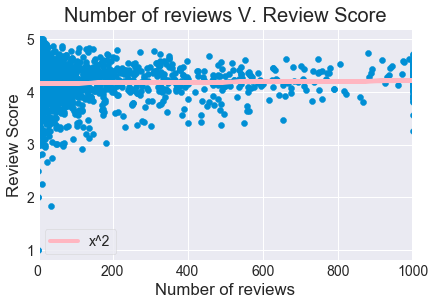

In [302]:
# Plotting polynomial regression
plt.scatter(n_of_reviews, review_score)
plt.plot(n_of_reviews_test, lr_reviews.predict(X2_reviews_test), label = "x^2", color = "lightpink")
plt.title("Number of reviews V. Review Score")
plt.legend()
plt.xlim(0, 1000)
plt.xlabel("Number of reviews")
plt.ylabel("Review Score")

Text(0, 0.5, 'Review Score')

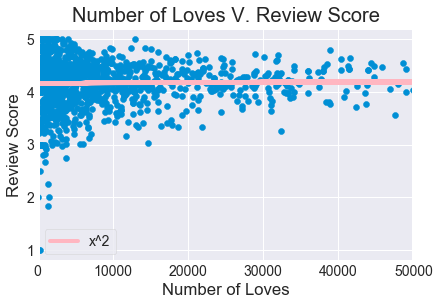

In [303]:
# Plotting polynomial regression
plt.scatter(n_of_loves, review_score)
plt.plot(n_of_loves_test, lr_loves.predict(X2_loves_test), label = "x^2", color = "lightpink")
plt.title("Number of Loves V. Review Score")
plt.xlim(0, 50000)
plt.legend()
plt.xlabel("Number of Loves")
plt.ylabel("Review Score")

Text(0, 0.5, 'Review Score')

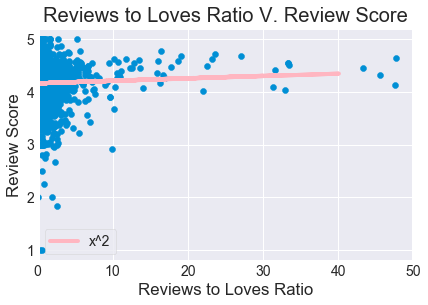

In [304]:
# Plotting polynomial regression
plt.scatter(reviews_to_loves_ratio, review_score)
plt.plot(reviews_to_loves_ratio_test, lr_review_love.predict(X2_review_love_test), label = "x^2", color = "lightpink")
plt.title("Reviews to Loves Ratio V. Review Score")
plt.xlim(0, 50)
plt.legend()
plt.xlabel("Reviews to Loves Ratio")
plt.ylabel("Review Score")

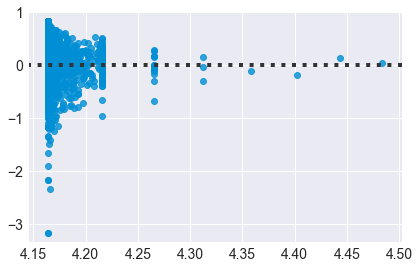

In [305]:
# Residuals, testing for homoscedasticity
sns.residplot(lr_reviews.predict(X2_reviews), review_score)

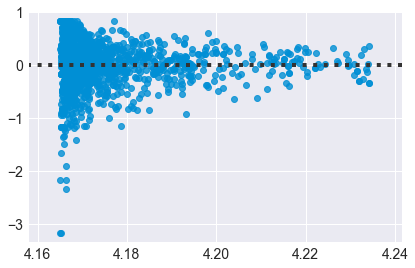

In [306]:
# Residuals, testing for homoscedasticity
sns.residplot(lr_loves.predict(X2_loves), review_score)

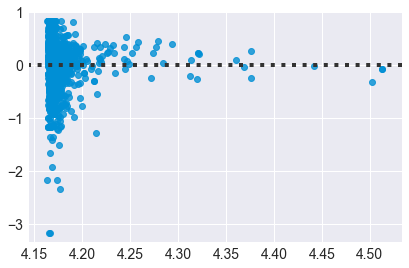

In [307]:
# Residuals, testing for homoscedasticity
sns.residplot(lr_review_love.predict(X2_review_love), review_score)

In [288]:
# Scikit Learn
# Multiple Linear Regression
# Create X and y
feature_cols = ['clean_product', 'category_Anti-Aging', 'category_BB_&_CC_Cream',
               'category_Bath_&_Shower', 'category_Beauty_Supplements',
               'category_Blemish_&_Acne_Treatments', 'category_Blotting_Papers',
               'category_Body_Lotions_&_Body_Oils',
               'category_Cellulite_&_Stretch_Marks',
               'category_Decollete_&_Neck_Creams', 'category_Exfoliators',
               'category_Eye_Creams_&_Treatments', 'category_Eye_Masks',
               'category_Face_Masks', 'category_Face_Oils', 'category_Face_Primer',
               'category_Face_Serums', 'category_Face_Sunscreen',
               'category_Face_Wash_&_Cleansers', 'category_Facial_Peels',
               'category_Foundation', 'category_Hair_Oil', 'category_Highlighter',
               'category_Holistic_Wellness', 'category_Mini_Size',
               'category_Mists_&_Essences', 'category_Moisturizer_&_Treatments',
               'category_Moisturizers', 'category_Night_Creams',
               'category_Setting_Spray_&_Powder', 'category_Sheet_Masks',
               'category_Skincare', 'category_Tinted_Moisturizer', 'category_Toners',
               'category_Tools', 'category_Value_&_Gift_Sets']
X = train[feature_cols]
y = train.review_score

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [289]:
print("Coefficients: ", lm2.coef_)

Coefficients:  [-1.24667267e-02 -2.36259636e-01 -3.79065691e-01 -2.36987782e+00
 -1.33603488e-01 -3.61907597e-01 -2.87877818e-01 -2.61711091e-01
 -4.36577818e-01 -5.68514848e-01  4.21822182e-01 -5.09794810e-01
 -5.06598647e-01 -9.94517555e-02 -5.87664560e-03 -5.19116697e-01
 -7.96861734e-02 -3.19863761e-01 -9.49356936e-02  1.73624823e-01
 -6.69877818e-01  4.66988909e-01 -6.61077818e-01  1.50138639e-02
 -8.88178420e-16 -1.10493984e-01  4.25551908e-03 -2.15189156e-01
 -4.31133261e-02 -3.78551127e-01 -3.77777818e-01 -2.66277818e-01
 -1.20077818e-01 -2.19622242e-01 -1.44855588e-01 -5.17227818e-01]


In [290]:
print("Intercept: ", lm2.intercept_)

Intercept:  4.369877817784147


In [291]:
print("R Squared: ", lm2.score(X, y))

R Squared:  0.16017479284014668


In [292]:
#Scikit Learn
# Multiple Regression
# Create X and y
feature_cols_2 = ['price', 'n_of_reviews', 'n_of_loves', 'clean_product',
                  'reviews_to_loves_ratio', 'return_on_reviews']
X_2 = train[feature_cols_2]
y_2 = train.review_score

# instantiate and fit
lm3 = LinearRegression()
lm3.fit(X_2, y_2)

print("Coefficients: ", lm3.coef_)
print("Intercept: ", lm3.intercept_)
print("R Squared: ", lm3.score(X_2, y_2))

Coefficients:  [4.31734919e-04 7.41161246e-05 6.97424237e-07 4.55699744e-02
 2.68694427e-03 1.58297861e-03]
Intercept:  4.0567036921910145
R Squared:  0.07869800904648871


In [293]:
# Scikit Learn
# Multiple Linear Regression
# Create X and y
feature_cols_3 = ['price', 'n_of_reviews', 'n_of_loves', 'clean_product',
                  'reviews_to_loves_ratio', 'return_on_reviews',
                'clean_product', 'category_Anti-Aging', 'category_BB_&_CC_Cream',
               'category_Bath_&_Shower', 'category_Beauty_Supplements',
               'category_Blemish_&_Acne_Treatments', 'category_Blotting_Papers',
               'category_Body_Lotions_&_Body_Oils',
               'category_Cellulite_&_Stretch_Marks',
               'category_Decollete_&_Neck_Creams', 'category_Exfoliators',
               'category_Eye_Creams_&_Treatments', 'category_Eye_Masks',
               'category_Face_Masks', 'category_Face_Oils', 'category_Face_Primer',
               'category_Face_Serums', 'category_Face_Sunscreen',
               'category_Face_Wash_&_Cleansers', 'category_Facial_Peels',
               'category_Foundation', 'category_Hair_Oil', 'category_Highlighter',
               'category_Holistic_Wellness', 'category_Mini_Size',
               'category_Mists_&_Essences', 'category_Moisturizer_&_Treatments',
               'category_Moisturizers', 'category_Night_Creams',
               'category_Setting_Spray_&_Powder', 'category_Sheet_Masks',
               'category_Skincare', 'category_Tinted_Moisturizer', 'category_Toners',
               'category_Tools', 'category_Value_&_Gift_Sets']
X_3 = train[feature_cols_3]
y_3 = train.review_score

# instantiate and fit
lm4 = LinearRegression()
lm4.fit(X_3, y_3)

print("Coefficients: ", lm4.coef_)
print("Intercept: ", lm4.intercept_)
print("R Squared: ", lm4.score(X_3, y_3))

Coefficients:  [ 1.38963006e-04  8.45778014e-05  1.44455825e-07  1.03577378e-03
  1.81813303e-03  1.51289689e-03  1.03577377e-03 -2.66020053e-01
 -4.10359819e-01 -2.48537002e+00 -2.22746380e-01 -3.67497302e-01
 -2.61908524e-01 -2.92025625e-01 -4.22667072e-01 -6.11635168e-01
  4.28161739e-01 -5.23849957e-01 -4.94550973e-01 -1.38183020e-01
 -2.64788150e-02 -5.50023592e-01 -1.34791893e-01 -3.28036129e-01
 -9.61136112e-02  1.29844123e-01 -6.55468493e-01  4.78656098e-01
 -6.48343557e-01 -9.91644287e-02  5.12090370e-14 -1.29511671e-01
 -2.02380381e-02 -2.41888923e-01 -7.75669658e-02 -3.88955145e-01
 -3.70278294e-01 -2.86573267e-01 -2.58853213e-01 -2.43980207e-01
 -1.66459885e-01 -6.36389689e-01]
Intercept:  4.319288292952138
R Squared:  0.22513189289722524


In [294]:
# Statsmodels
# Multiple Regression
y_1 = train["review_score"]
x_1 = train[['price', 'n_of_reviews', 'n_of_loves', 'clean_product',
                  'reviews_to_loves_ratio', 'return_on_reviews']]
f_1 = "review_score~price+n_of_reviews+n_of_loves+clean_product+reviews_to_loves_ratio+return_on_reviews"

model_1 = smf.ols(formula = f_1, data = train).fit()

In [295]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     19.13
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           1.74e-21
Time:                        12:23:04   Log-Likelihood:                -799.51
No. Observations:                1351   AIC:                             1613.
Df Residuals:                    1344   BIC:                             1649.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.0567      0.024    171.355      0.000       4.010       4.103
price                      0.0004      0.000      1.720      0.086   -6.05e-05       0.001
n_of_reviews            7.412e-05   3.94e-05      1.882      0.060   -3.13e-06       0.000
n_of_loves              6.974e-07   8.16e-07      0.855      0.393   -9.03e-07     2.3e-06
clean_product              0.0456      0.031      1.471      0.141      -0.015       0.106
reviews_to_loves_ratio     0.0027      0.001      2.138      0.033       0.000       0.005
return_on_reviews          0.0016      0.000     10.044      0.000       0.001       0.002
==============================================================================
Omnibus:                      466.137   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2652.703
Skew:                          -1.492   Prob(JB):                         0.00
Kurtosis:                       9.182   Cond. No.                     7.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [296]:
# Log Transformations
log_n_of_reviews = np.log(pretty_regression["n_of_reviews"])
log_price = np.log(pretty_regression["price"])
log_n_of_loves = np.log(pretty_regression["n_of_loves"])
log_return_on_reviews = np.log(pretty_regression["return_on_reviews"])

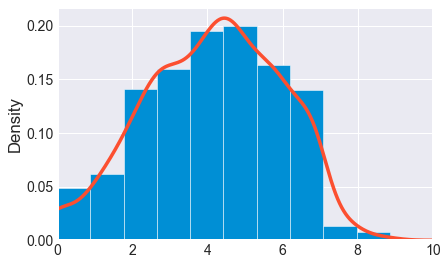

In [297]:
# Plot new log_transformed variables
log_n_of_reviews.plot.hist(normed = True)
log_n_of_reviews.plot.kde(linewidth = 3.5)
plt.xlim(0, 10)
plt.show()

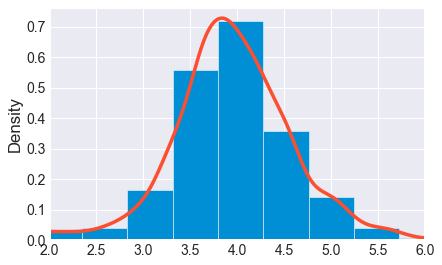

In [298]:
# Plot new log_transformed variables
log_price.plot.hist(normed = True)
log_price.plot.kde(linewidth = 3.5)
plt.xlim(2, 6)
plt.show()

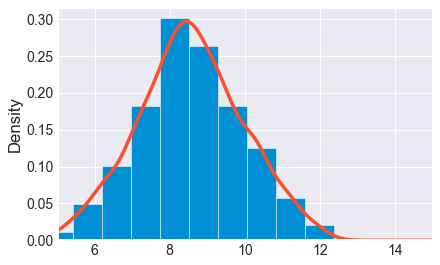

In [299]:
# Plot new log_transformed variables
log_n_of_loves.plot.hist(normed = True)
log_n_of_loves.plot.kde(linewidth = 3.5)
plt.xlim(5, 15)
plt.show()

In [300]:
# Build new dataframe with transformed variables
data_new = pd.DataFrame([])
data_new["log_n_of_reviews"]= log_n_of_reviews
data_new["log_price"]= log_price
data_new["log_n_of_loves"] = log_n_of_loves
data_new["clean_product"] = pretty_numbers["clean_product"]
data_new["category_Moisturizers"] = pretty_numbers["category_Moisturizers"]
data_new["category_Blemish_&_Acne_Treatments"] = pretty_numbers["category_Blemish_&_Acne_Treatments"]
data_new["category_Face_Serums"] = pretty_numbers["category_Face_Serums"]
data_new["category_Beauty_Supplements"] = pretty_numbers["category_Beauty_Supplements"]

data_new["review_score"] = pretty_numbers["review_score"]

In [206]:
y = data_new[["review_score"]]
X = data_new.drop(["review_score"], axis=1)

In [207]:
# Regression and baseline model
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

# Cross Validation Score
baseline = np.mean(cross_val_score(regression, X, y, scoring="r2", cv=crossvalidation))
baseline

0.010264300444774813

In [208]:
# Interactions between clean_product and log_price
#create new data set for each possibility
clean_1 = data_new[data_new["clean_product"] == 1]
clean_0 = data_new[data_new["clean_product"] == 0]

In [209]:
# Regression
clean_regression_0 = LinearRegression()
clean_regression_1 = LinearRegression()

# Reshape
log_price_0 = clean_0["log_price"].values.reshape(-1, 1)
log_price_1 = clean_1["log_price"].values.reshape(-1, 1)

# Fit
clean_regression_0.fit(log_price_0, clean_0["review_score"])
clean_regression_1.fit(log_price_1, clean_1["review_score"])

# Make predictions using the testing set
pred_0 = clean_regression_0.predict(log_price_0)
pred_1 = clean_regression_1.predict(log_price_1)

# The coefficients
print(clean_regression_0.coef_)
print(clean_regression_1.coef_)

[0.03907784]
[0.01906682]


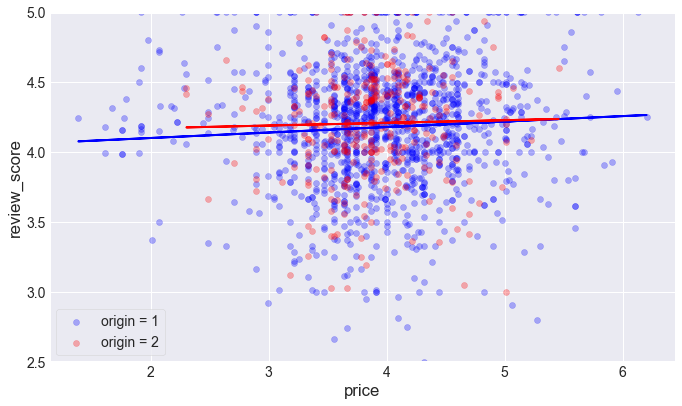

In [210]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(log_price_0, clean_0["review_score"],  color='blue', alpha = 0.3, label = "origin = 1")
plt.scatter(log_price_1, clean_1["review_score"],  color='red', alpha = 0.3, label = "origin = 2")

plt.plot(log_price_0, pred_0,  color='blue', linewidth=2)
plt.plot(log_price_1, pred_1,  color='red', linewidth=2)

plt.ylabel("review_score")
plt.xlabel("price")
plt.ylim(2.5, 5)
plt.legend();

In [211]:
# Add interaction effect to see how it affects R2
regression_int = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact["price_clean"] = X["log_price"] * X["clean_product"]

interact_price_clean = np.mean(cross_val_score(regression_int, X_interact, y, scoring="r2", cv=crossvalidation))
interact_price_clean

0.010494272611424512

In [212]:
X_interact = sm.add_constant(X_interact)
model_int = sm.OLS(y,X_interact)
results = model_int.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     3.965
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           5.09e-05
Time:                        09:41:23   Log-Likelihood:                -1008.9
No. Observations:                1689   AIC:                             2038.
Df Residuals:                    1679   BIC:                             2092.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.8587      0.133     29.070      0.000       3.598       4.119
log_n_of_reviews                      -0.0210      0.011     -1.958      0.050      -0.042    3.77e-05
log_price                              0.0386      0.019      2.047      0.041       0.002       0.076
log_n_of_loves                         0.0265      0.014      1.867      0.062      -0.001       0.054
clean_product                          0.1998      0.210      0.952      0.341      -0.212       0.611
category_Moisturizers                  0.0249      0.027      0.915      0.360      -0.029       0.078
category_Blemish_&_Acne_Treatments    -0.1323      0.061     -2.180      0.029      -0.251      -0.013
category_Face_Serums                   0.1099      0.030      3.681      0.000       0.051       0.168
category_Beauty_Supplements            0.1019      0.047      2.158      0.031       0.009       0.195
price_clean                           -0.0426      0.054     -0.794      0.427      -0.148       0.063
==============================================================================
Omnibus:                      405.784   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1730.471
Skew:                          -1.090   Prob(JB):                         0.00
Kurtosis:                       7.454   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [213]:
# Interactions between category_Moisturizer and log_n_loves
#create new data set for each possibility
moist_1 = data_new[data_new["category_Moisturizers"] == 1]
moist_0 = data_new[data_new["category_Moisturizers"] == 0]

In [214]:
# Regression
moist_regression_0 = LinearRegression()
moist_regression_1 = LinearRegression()

# Reshape
log_n_of_loves_0 = moist_0["log_n_of_loves"].values.reshape(-1, 1)
log_n_of_loves_1 = moist_1["log_n_of_loves"].values.reshape(-1, 1)

# Fit
moist_regression_0.fit(log_n_of_loves_0, moist_0["review_score"])
moist_regression_1.fit(log_n_of_loves_1, moist_1["review_score"])

# Make predictions using the testing set
pred_0_moist = moist_regression_0.predict(log_n_of_loves_0)
pred_1_moist = moist_regression_1.predict(log_n_of_loves_1)

# The coefficients
print(moist_regression_0.coef_)
print(moist_regression_1.coef_)

[-0.01243637]
[0.02180656]


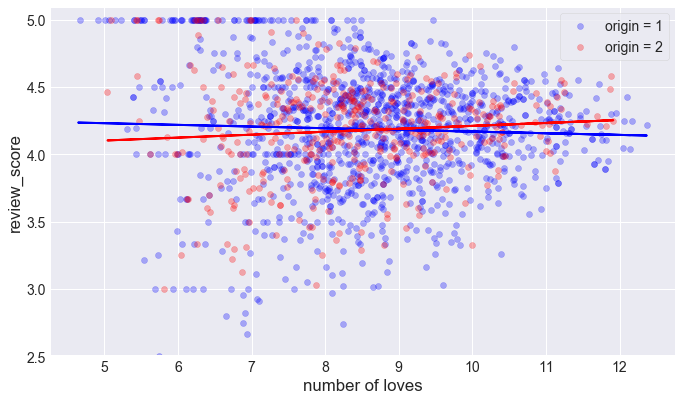

In [215]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(log_n_of_loves_0, moist_0["review_score"],  color='blue', alpha = 0.3, label = "origin = 1")
plt.scatter(log_n_of_loves_1, moist_1["review_score"],  color='red', alpha = 0.3, label = "origin = 2")

plt.plot(log_n_of_loves_0, pred_0_moist,  color='blue', linewidth=2)
plt.plot(log_n_of_loves_1, pred_1_moist,  color='red', linewidth=2)

plt.ylabel("review_score")
plt.xlabel("number of loves")
plt.ylim(2.5, 5.1)
plt.legend();

In [216]:
# Add interaction effect to see how it affects R2
regression_moist = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact_2 = X.copy()
X_interact_2["love_moisturizer"] = X["log_n_of_loves"] * X["category_Moisturizers"]

interact_love_moisturizer = np.mean(cross_val_score(regression_moist, X_interact_2, y, scoring="r2", cv=crossvalidation))
interact_love_moisturizer

0.010865131279467718

In [217]:
X_interact_2 = sm.add_constant(X_interact_2)
model_moist = sm.OLS(y,X_interact_2)
results = model_moist.fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.176
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           2.38e-05
Time:                        09:41:30   Log-Likelihood:                -1008.0
No. Observations:                1689   AIC:                             2036.
Df Residuals:                    1679   BIC:                             2090.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  3.9445      0.134     29.355      0.000       3.681       4.208
log_n_of_reviews                      -0.0210      0.011     -1.957      0.051      -0.042    4.91e-05
log_price                              0.0334      0.018      1.879      0.060      -0.001       0.068
log_n_of_loves                         0.0190      0.015      1.291      0.197      -0.010       0.048
clean_product                          0.0349      0.028      1.258      0.208      -0.019       0.089
category_Moisturizers                 -0.2188      0.157     -1.398      0.162      -0.526       0.088
category_Blemish_&_Acne_Treatments    -0.1306      0.061     -2.153      0.031      -0.249      -0.012
category_Face_Serums                   0.1066      0.030      3.574      0.000       0.048       0.165
category_Beauty_Supplements            0.0930      0.047      1.965      0.050       0.000       0.186
love_moisturizer                       0.0287      0.018      1.576      0.115      -0.007       0.064
==============================================================================
Omnibus:                      406.869   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1720.130
Skew:                          -1.096   Prob(JB):                         0.00
Kurtosis:                       7.431   Cond. No.                         170.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [248]:
# Build last dataframe with transformed variables
data_last = pd.DataFrame([])
data_last["log_n_of_reviews"]= log_n_of_reviews
data_last["log_price"]= log_price
data_last["log_n_of_loves"] = log_n_of_loves
data_last["clean_product"] = pretty_numbers["clean_product"]
data_last["category_Moisturizers"] = pretty_numbers["category_Moisturizers"]
data_last["category_Blemish_Acne_Treatments"] = pretty_numbers["category_Blemish_&_Acne_Treatments"]
data_last["category_Face_Serums"] = pretty_numbers["category_Face_Serums"]
data_last["category_Beauty_Supplements"] = pretty_numbers["category_Beauty_Supplements"]
data_last["category_Anti_Aging"] = pretty_numbers["category_Anti-Aging"]
data_last["category_Eye_Creams_Treatments"] = pretty_numbers["category_Eye_Creams_&_Treatments"]
data_last["category_Eye_Masks"] = pretty_numbers["category_Eye_Masks"]
data_last["category_Mists_Essences"] = pretty_numbers["category_Mists_&_Essences"]
data_last["category_Face_Masks"] = pretty_numbers["category_Face_Masks"]
data_last["category_Face_Oils"] = pretty_numbers["category_Face_Oils"]
data_last["category_Face_Wash_Cleansers"] = pretty_numbers["category_Face_Wash_&_Cleansers"]
data_last["category_Decollete_Neck_Creams"] = pretty_numbers["category_Decollete_&_Neck_Creams"]
data_last["category_Night_Creams"] = pretty_numbers["category_Night_Creams"]
data_last["category_Sheet_Masks"] = pretty_numbers["category_Sheet_Masks"]
data_last["category_Toners"] = pretty_numbers["category_Toners"]
data_last["review_score"] = pretty_numbers["review_score"]

In [249]:
data_last.head()

,log_n_of_reviews,log_price,log_n_of_loves,clean_product,category_Moisturizers,category_Blemish_Acne_Treatments,category_Face_Serums,category_Beauty_Supplements,category_Anti_Aging,category_Eye_Creams_Treatments,category_Eye_Masks,category_Mists_Essences,category_Face_Masks,category_Face_Oils,category_Face_Wash_Cleansers,category_Decollete_Neck_Creams,category_Night_Creams,category_Sheet_Masks,category_Toners,review_score
0,6.907755,4.219508,11.820469,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2097
1,6.200509,5.164786,11.029196,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0974
2,7.600902,3.663562,12.146264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0403
3,6.907755,4.219508,11.913867,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2447
4,6.669498,5.187386,11.140121,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4.0622


In [230]:
y_last = data_last[["review_score"]]
X_last = data_last.drop(["review_score"], axis=1)

In [231]:
# Split X and y into X_

X_train_last, X_test_last, y_train_last, y_test_last = train_test_split(X_last, y_last, test_size=0.25, random_state=1)




In [232]:
# instantiate and fit
lmlast = LinearRegression()
lmlast.fit(X_train_last, y_train_last)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [233]:
for idx, col_name in enumerate(X_train_last.columns):
    print("The coefficient for {} is {}".format(col_name, lmlast.coef_[0][idx]))
print("The Intercept is: ", lmlast.intercept_)
print("The R Squared: ", lmlast.score(X_train_last, y_train_last))

The coefficient for log_n_of_reviews is -0.018043150960912566
The coefficient for log_price is 0.049016252525889974
The coefficient for log_n_of_loves is 0.02381105775861285
The coefficient for clean_product is 0.042485676590809505
The coefficient for category_Moisturizers is -0.03031024516795251
The coefficient for category_Blemish_&_Acne_Treatments is -0.17787815286493128
The coefficient for category_Face_Serums is 0.052723278991213963
The coefficient for category_Beauty_Supplements is 0.016819462236687767
The coefficient for category_Anti-Aging is -0.11621074282098885
The coefficient for category_Eye_Creams_&_Treatments is -0.3557499535790558
The coefficient for category_Eye_Masks is -0.2242903672980028
The coefficient for category_Mists_&_Essences is 0.07947037765974166
The coefficient for category_Face_Masks is 0.044032078429094255
The coefficient for category_Face_Oils is 0.17482455011450643
The coefficient for category_Face_Wash_&_Cleansers is 0.12372668467805317
The coefficient

In [238]:
# Mean squared error
y_predict_last = lmlast.predict(X_test_last)

regression_model_mse = mean_squared_error(y_predict_last, y_test_last)

regression_model_mse

0.16235853436764208

In [235]:
# Square root of MSE
math.sqrt(regression_model_mse)

0.4029373826882312

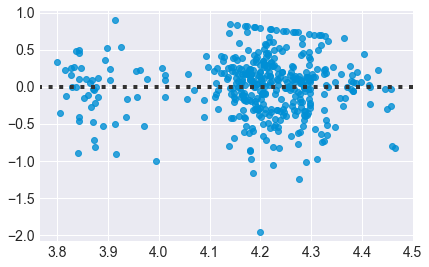

In [236]:
sns.residplot(y_predict_last, y_test_last)

In [250]:
# Statsmodels
# Multiple Regression
y_last_stats = data_last["review_score"]
x_last_stats = data_last[["log_n_of_reviews", "log_price", "log_n_of_loves", "category_Moisturizers",  "category_Blemish_Acne_Treatments",
                            "category_Beauty_Supplements", "category_Anti_Aging", "category_Eye_Creams_Treatments",
                            "category_Eye_Masks", "category_Mists_Essences", "category_Face_Masks", "category_Face_Oils",
                            "category_Face_Wash_Cleansers", "category_Decollete_Neck_Creams", "category_Night_Creams",
                             "category_Sheet_Masks", "category_Toners"]] 
                        
f_last ='''review_score~log_n_of_reviews+log_price+log_n_of_loves+clean_product+category_Moisturizers+
        category_Blemish_Acne_Treatments+category_Beauty_Supplements+category_Anti_Aging+
            category_Eye_Creams_Treatments+category_Eye_Masks+category_Mists_Essences+category_Face_Masks+
            category_Face_Oils+category_Face_Wash_Cleansers+category_Decollete_Neck_Creams+category_Night_Creams+
            category_Sheet_Masks+category_Toners'''

model_super_last = smf.ols(formula = f_last, data = data_last).fit()

In [251]:
model_super_last.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     11.26
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           3.49e-31
Time:                        10:18:51   Log-Likelihood:                -929.92
No. Observations:                1689   AIC:                             1898.
Df Residuals:                    1670   BIC:                             2001.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.0101      0.125     32.086      0.000       3.765       4.255
log_n_of_reviews                    -0.0194      0.010     -1.880      0.060      -0.040       0.001
log_price                            0.0413      0.017      2.365      0.018       0.007       0.076
log_n_of_loves                       0.0182      0.014      1.337      0.181      -0.009       0.045
clean_product                        0.0067      0.027      0.251      0.802      -0.046       0.059
category_Moisturizers               -0.0699      0.028     -2.471      0.014      -0.125      -0.014
category_Blemish_Acne_Treatments    -0.2198      0.059     -3.714      0.000      -0.336      -0.104
category_Beauty_Supplements          0.0011      0.046      0.024      0.981      -0.090       0.092
category_Anti_Aging                 -0.1517      0.087     -1.747      0.081      -0.322       0.019
category_Eye_Creams_Treatments      -0.3877      0.036    -10.887      0.000      -0.457      -0.318
category_Eye_Masks                  -0.3090      0.097     -3.186      0.001      -0.499      -0.119
category_Mists_Essences              0.0142      0.049      0.289      0.772      -0.082       0.111
category_Face_Masks                  0.0117      0.072      0.162      0.871      -0.130       0.154
category_Face_Oils                   0.1370      0.045      3.061      0.002       0.049       0.225
category_Face_Wash_Cleansers         0.0591      0.094      0.626      0.531      -0.126       0.244
category_Decollete_Neck_Creams      -0.4337      0.119     -3.654      0.000      -0.667      -0.201
category_Night_Creams                0.0577      0.052      1.101      0.271      -0.045       0.160
category_Sheet_Masks                -0.1656      0.424     -0.390      0.696      -0.998       0.667
category_Toners                     -0.0039      0.161     -0.024      0.981      -0.319       0.311
==============================================================================
Omnibus:                      462.111   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2451.947
Skew:                          -1.179   Prob(JB):                         0.00
Kurtosis:                       8.411   Cond. No.                         434.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [252]:
# Statsmodels
# Multiple Regression
y_last_stats_2 = data_last["review_score"]
x_last_stats_2 = data_last[["log_n_of_reviews", "log_price", "category_Moisturizers", "category_Blemish_Acne_Treatments",
                         "category_Eye_Creams_Treatments","category_Eye_Masks", "category_Face_Masks", "category_Face_Oils",
                            "category_Decollete_Neck_Creams"]] 
                        
f_last_2 ='''review_score~log_n_of_reviews+log_price+category_Moisturizers+
        category_Blemish_Acne_Treatments+category_Eye_Creams_Treatments+category_Eye_Masks+category_Face_Masks+
            category_Face_Oils+category_Decollete_Neck_Creams'''

model_super_last_2 = smf.ols(formula = f_last_2, data = data_last).fit()

In [253]:
model_super_last_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     21.72
Date:                Fri, 19 Apr 2019   Prob (F-statistic):           3.96e-35
Time:                        10:22:56   Log-Likelihood:                -933.68
No. Observations:                1689   AIC:                             1887.
Df Residuals:                    1679   BIC:                             1942.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            4.1460      0.073     56.531      0.000       4.002       4.290
log_n_of_reviews                    -0.0077      0.006     -1.306      0.192      -0.019       0.004
log_price                            0.0356      0.016      2.160      0.031       0.003       0.068
category_Moisturizers               -0.0792      0.026     -3.103      0.002      -0.129      -0.029
category_Blemish_Acne_Treatments    -0.2279      0.058     -3.938      0.000      -0.341      -0.114
category_Eye_Creams_Treatments      -0.3923      0.034    -11.617      0.000      -0.459      -0.326
category_Eye_Masks                  -0.3117      0.096     -3.246      0.001      -0.500      -0.123
category_Face_Masks                  0.0134      0.071      0.187      0.852      -0.127       0.154
category_Face_Oils                   0.1362      0.043      3.174      0.002       0.052       0.220
category_Decollete_Neck_Creams      -0.4363      0.118     -3.695      0.000      -0.668      -0.205
==============================================================================
Omnibus:                      469.538   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2507.998
Skew:                          -1.198   Prob(JB):                         0.00
Kurtosis:                       8.467   Cond. No.                         68.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""